<a href="https://colab.research.google.com/github/DanielErnestoThompson/Weather-Data-Analysis-2024/blob/main/Weather_Analysis_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

In [15]:
def generate_weather_data(num_days):
    base_date = datetime.today()
    date_list = [base_date - timedelta(days=x) for x in range(num_days)]

    # Generate random weather data
    temperatures = np.random.randint(low=-10, high=35, size=num_days)  # Temperatures between -10 and 35 degrees Celsius
    precipitation = np.random.rand(num_days) * 10  # Precipitation levels between 0 and 10 mm

    # Create a DataFrame
    data = {'date': date_list, 'temperature': temperatures, 'precipitation': precipitation}
    weather_data = pd.DataFrame(data)

    return weather_data

# Generate data for, say, 365 days
weather_data = generate_weather_data(365)


In [16]:
# Introduce some missing values
for _ in range(10):
    idx = np.random.choice(weather_data.index)
    weather_data.loc[idx, 'temperature'] = np.nan
    weather_data.loc[idx, 'precipitation'] = np.nan

# Handle missing values
weather_data.fillna(method='ffill', inplace=True)

       temperature  precipitation
count   365.000000     365.000000
mean     11.764384       4.915496
std      12.769484       2.991467
min     -10.000000       0.011107
25%       1.000000       2.260546
50%      12.000000       4.673481
75%      23.000000       7.593067
max      34.000000       9.999372


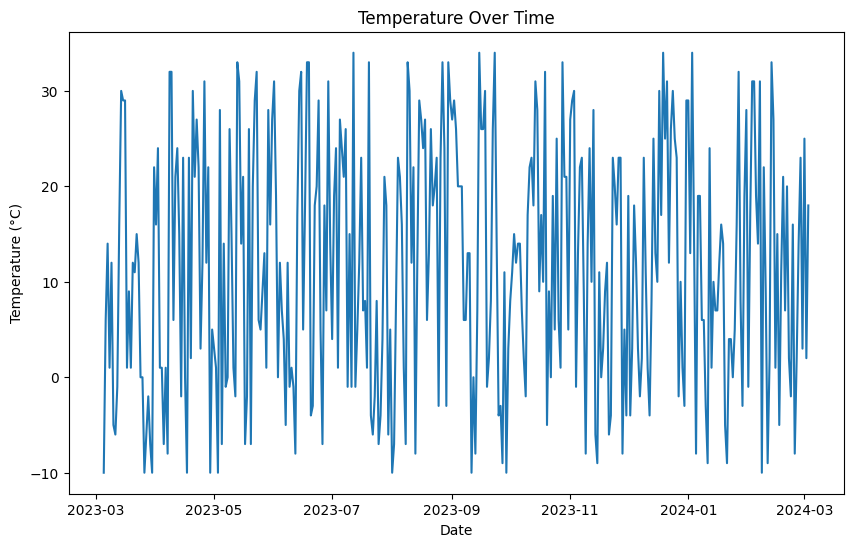

In [17]:
# Simple analysis: Describe the data
print(weather_data.describe())

# Visualization: Plotting temperature over time
plt.figure(figsize=(10, 6))
plt.plot(weather_data['date'], weather_data['temperature'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

In [18]:
# Define the base path for your project
base_path = '/content/drive/My Drive/Colab Notebooks/weather-data-analysis/'

# Ensure the data directory exists
data_dir = os.path.join(base_path, 'data')
os.makedirs(data_dir, exist_ok=True)  # This creates the directory if it doesn't exist and does nothing if it does

# Now, define the full file path
file_path = os.path.join(data_dir, 'generated_weather_data.csv')

# Save the file
weather_data.to_csv(file_path, index=False)
